**Data Camp Panda Notes: Part 1**

- Panda is good for arrays with different types of variables

In [78]:
#Creating a panda - method 1: from a dictionary
#Keys = column labels, Values = data column by column

dict = {
    "name": ["Ben", "Andrea", "Mia", "Coffee"],
    "age": [35, 33, 2, 10],
    "hair": ["red", "black", "brown", "white"]

    }

import pandas as pd

family = pd.DataFrame(dict)


In [79]:
family

,age,hair,name
0,35,red,Ben
1,33,black,Andrea
2,2,brown,Mia
3,10,white,Coffee


In [80]:
#manually rename indices using .index method

family.index = ["B", "A", "M", "C"]
family

,age,hair,name
B,35,red,Ben
A,33,black,Andrea
M,2,brown,Mia
C,10,white,Coffee


In [81]:
#Creating a panda - method 2: from a CSV file
family_csv = "/Users/Benjamin's/Documents/Data_Science/Class-Practice-Repo/todo3/panda_notes_bnaismith.csv"
family = pd.read_csv(family_csv)

#Also add 'index_col = 0' so that index 0 becomes the category names

family = pd.read_csv(family_csv, index_col = 0)
family


,Age,Hair,Name
B,35,red,Ben
A,33,black,Andrea
M,2,brown,Mia
C,10,white,Coffee


**Data Camp Panda Notes: Part 2**

- how to select and index data

In [82]:
#using single square brackets -> series

print(type(family["Age"]))

family["Age"]


<class 'pandas.core.series.Series'>


B    35
A    33
M     2
C    10
Name: Age, dtype: int64

In [83]:
#using double square brackets -> series

print(type(family[["Age"]]))

family[["Age"]]


<class 'pandas.core.frame.DataFrame'>


,Age
B,35
A,33
M,2
C,10


In [84]:
#Or with two columns

family[["Age", "Hair"]]

,Age,Hair
B,35,red
A,33,black
M,2,brown
C,10,white


In [85]:
#Or a selection of rows, though square brackets has limited functionality

family[1:3]

,Age,Hair,Name
A,33,black,Andrea
M,2,brown,Mia


In [86]:
#Two other ways  = 'loc' and 'iloc'

family.loc["B"] #Single square brackets

Age      35
Hair    red
Name    Ben
Name: B, dtype: object

In [87]:
#or

family.loc[["B"]] #Double square brackets

,Age,Hair,Name
B,35,red,Ben


In [88]:
#or with more rows

family.loc[["B", "A"]] #Double square brackets

,Age,Hair,Name
B,35,red,Ben
A,33,black,Andrea


In [89]:
#or with only certain columns

family.loc[["B", "A"], ["Name"]]

,Name
B,Ben
A,Andrea


In [90]:
#can also use : to index certain columns

family.loc[:"M", ["Name"]]

,Name
B,Ben
A,Andrea
M,Mia


**loc (label-based) -> row and column access = better than just square brackets

In [91]:
#iloc is same as loc but based on index number instead of label

family.iloc[[0, 1], [2]]

,Name
B,Ben
A,Andrea


**Additional notes from Data Science Handbok**

- Index objects are immutable vs. NumPy arrays are mutable

Python Operator	Pandas Method(s)
+	add()
-	sub(), subtract()
*	mul(), multiply()
/	truediv(), div(), divide()
//	floordiv()
%	mod()
**	pow()

**Need to study/practice (even understand?) Ufuncs**

**Use 'None' or 'NaN' (Not a Number) for missing data**
- e.g. 1 + np.nan = nan

In [92]:
#Panda help package
help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic and

**Examining 'placestoeat_haring.csv'**

In [93]:
restaurants = pd.read_csv('placestoeat_haring.csv', index_col = 'Place')
print(restaurants)

                         Neighborhood Price
Place                                      
Girasole                    Shadyside    $$
Smallman Galley             The Strip    $$
Pastolis                Squirrel Hill     $
Gaucho                      The Strip    $$
Spice Island Tea House  South Oakland     $
Fatheads                   South Side     $
Pamela's                      Oakland     $
Noodlehead               East Liberty     $
SMOKE                   Lawrenceville    $$
The Yard                    Shadyside    $$
All India               North Oakland     $
The Columbian Spot         South Side     $
Chicken Latino              The Strip     $
Bangkok Balcony         Squirrel Hill    $$
Emporio                      Downtown    $$


In [94]:
import pandas as pd
restaurants = pd.read_csv('placestoeat_haring.csv')
restaurants.set_index('Place')

,Neighborhood,Price
Place,,
Girasole,Shadyside,$$
Smallman Galley,The Strip,$$
Pastolis,Squirrel Hill,$
Gaucho,The Strip,$$
Spice Island Tea House,South Oakland,$
Fatheads,South Side,$
Pamela's,Oakland,$
Noodlehead,East Liberty,$
SMOKE,Lawrenceville,$$


In [95]:
#change order of columns permanently
restaurants = restaurants[['Place', 'Price', 'Neighborhood']]
restaurants

,Place,Price,Neighborhood
0,Girasole,$$,Shadyside
1,Smallman Galley,$$,The Strip
2,Pastolis,$,Squirrel Hill
3,Gaucho,$$,The Strip
4,Spice Island Tea House,$,South Oakland
5,Fatheads,$,South Side
6,Pamela's,$,Oakland
7,Noodlehead,$,East Liberty
8,SMOKE,$$,Lawrenceville
9,The Yard,$$,Shadyside


In [96]:
#Show only more expensive resaurants
restaurants[restaurants.Price == '$$']

,Place,Price,Neighborhood
0,Girasole,$$,Shadyside
1,Smallman Galley,$$,The Strip
3,Gaucho,$$,The Strip
8,SMOKE,$$,Lawrenceville
9,The Yard,$$,Shadyside
13,Bangkok Balcony,$$,Squirrel Hill
14,Emporio,$$,Downtown


**How to sort items in a data array, e.g. alphabetically?** - ask next class

In [97]:
#example with loc
restaurants.loc['Gaucho':'SMOKE','Price']

Series([], Name: Price, dtype: object)

In [98]:
#same example but with iloc
restaurants.iloc[3:9,1]

3    $$
4     $
5     $
6     $
7     $
8    $$
Name: Price, dtype: object

**ToDo5 additions**

In [99]:
#additional methods covered in class

#How many restaurants cost $$? (using 'size method)

restaurants.loc[restaurants['Price'] == '$$', 'Price'].size
#without 'Price' in second argument, it returns 21, i.e. data from all three column for those rows


7

In [100]:
#Another way to see how many occurences of each value is using 'value_counts' method
restaurants['Price'].value_counts()

$     8
$$    7
Name: Price, dtype: int64

In [101]:
#What are the different unique neighbourhoods? 
#Using 'unique' method

restaurants['Neighborhood'].unique()

array(['Shadyside', 'The Strip', 'Squirrel Hill', 'South Oakland',
       'South Side', 'Oakland', 'East Liberty', 'Lawrenceville',
       'North Oakland', 'Downtown'], dtype=object)

**Notes from Data Camp about graphs and visualizations**

In [106]:
import matplotlib.pyplot as plt

#needs numeric data to plot, so adding a column to my original 'family' data frame
family.assign(Height = [6.2, 5.5, 2.5, 0.6])


,Age,Hair,Name,Height
B,35,red,Ben,6
A,33,black,Andrea,5
M,2,brown,Mia,2
C,10,white,Coffee,1


In [107]:
family.plot(x='Age', y='Height')
plt.show()

#Why this error?

KeyError: 'Height'

In [117]:
#new dict to test plotting:

dict2 = {
    "Class": ["DS", "PP", "RM", "ASL"],
    "Ideal": [90, 95, 100, 85 ],
    "Likely": [80, 90, 95, 80]
    }

grades = pd.DataFrame(dict2)
grades = grades.set_index('Class')

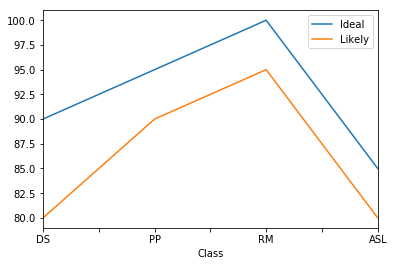

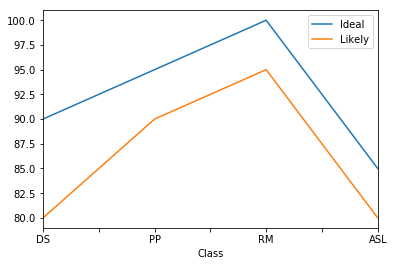

In [123]:
#plot method with default line graphs
grades.plot()
plt.show()

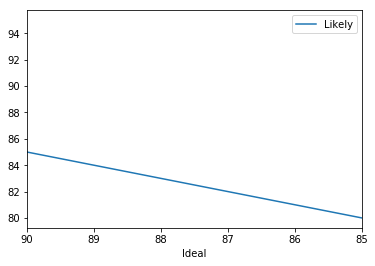

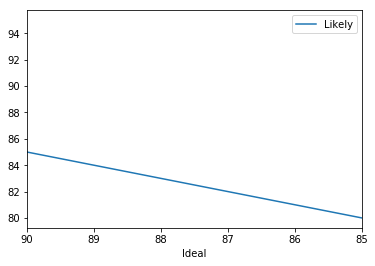

In [126]:
#specifiying which columns to plot
grades.plot(x='Ideal', y='Likely')
plt.show()

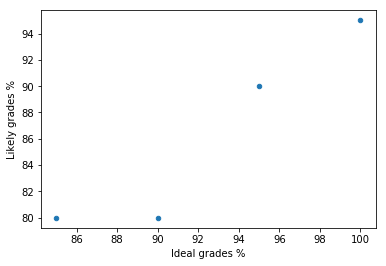

In [129]:
#change to scatter plot
grades.plot(x='Ideal', y='Likely', kind = 'scatter')

#can rename axes too
plt.xlabel('Ideal grades %')
plt.ylabel('Likely grades %')

plt.show()

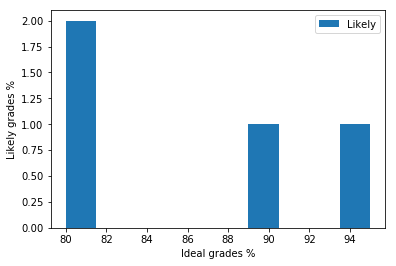

In [130]:
#make histogram

grades.plot(x='Ideal', y='Likely', kind = 'hist')

#can rename axes too
plt.xlabel('Ideal grades %')
plt.ylabel('Likely grades %')

plt.show()

#Good for normal distribution (not the case here!)

Some statistical descriptions:

.count (counts values of all columns)
.mean
.median
.std (standard deviation)
.quantile (range between different quantiles)
.min
.max

All of these ignore null entries

In [131]:
grades.count()

Ideal     4
Likely    4
dtype: int64

In [132]:
grades.mean()

Ideal     92.50
Likely    86.25
dtype: float64

In [133]:
grades.median()

Ideal     92.5
Likely    85.0
dtype: float64

In [134]:
grades.std()

Ideal     6.454972
Likely    7.500000
dtype: float64

In [136]:
q = [0.25, 0.75] #but could choose any range
grades.quantile(q)

,Ideal,Likely
0.25,88.75,80.00
0.75,96.25,91.25


In [137]:
grades.min()

Ideal     85
Likely    80
dtype: int64

In [138]:
grades.max()

Ideal     100
Likely     95
dtype: int64

In [139]:
grades.describe()

,Ideal,Likely
count,4.000000,4.00
mean,92.500000,86.25
std,6.454972,7.50
min,85.000000,80.00
25%,88.750000,80.00
50%,92.500000,85.00
75%,96.250000,91.25
max,100.000000,95.00


In [143]:
#To make filters:

indices = grades['Ideal'] >= 90 #specify and name the filter
ideal_90 = grades.loc[indices, :] #extract the new data frame, probably using loc or iloc
ideal_90

,Ideal,Likely
Class,,
DS,90,80
PP,95,90
RM,100,95


In [155]:
#to plot multiple plots, use multiple .plt commands before getting to final plt.show()

#Can create axes in first line of the code, e.g. plt.axes([0.05, 0.05, 0.425, 0.9])

#subplot() can create stacked graphs
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Return a subplot axes positioned by the given grid definition.
    
    Typical call signature::
    
      subplot(nrows, ncols, plot_number)
    
    Where *nrows* and *ncols* are used to notionally split the figure
    into ``nrows * ncols`` sub-axes, and *plot_number* is used to identify
    the particular subplot that this function is to create within the notional
    grid. *plot_number* starts at 1, increments across rows first and has a
    maximum of ``nrows * ncols``.
    
    In the case when *nrows*, *ncols* and *plot_number* are all less than 10,
    a convenience exists, such that the a 3 digit number can be given instead,
    where the hundreds represent *nrows*, the tens represent *ncols* and the
    units represent *plot_number*. For instance::
    
      subplot(211)
    
    produces a subaxes in a figure which represents the top plot (i.e. the
    first) in a 2 row by 1 column notiona